**Fall 2025 Machine Learning (CSCI-574-01W)**

Name: **Lon Cherryholmes, Sr.**

Date: October 24, 2025

CWID-5: xxx17840

In [1]:
import math
import time
import numpy as np
import pandas as pd
import seaborn as sbn
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from pprint import pformat, pprint

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import SGDRegressor, SGDClassifier
from sklearn.ensemble     import RandomForestRegressor, RandomForestClassifier
from sklearn.tree         import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.dummy        import DummyClassifier
from sklearn.neighbors    import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.metrics import mean_squared_error, root_mean_squared_error

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import learning_curve

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer

from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.compose import make_column_selector, make_column_transformer

from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.multioutput import ClassifierChain

# Question 1

Write a function that takes a numpy array of any shape as input.  This function should replace the largest value in the array with 42 and the smallest value in
the array with -42.  You should make a copy of the array and return the copy, do not modify the original array passed in to the function. Use the following
function documentation/signature for this problem:

```python
def array_forty_two(a):
    """Given a numpy array, a copy of the array is made.  Then the largest
    value in the original array is determined and replaced with 42.  Also the
    smallest value in the array is determined and replaced with -42.  The copy
    with the modified max=42, min=-42 is returned as a result

    Parameters
    ----------
    a - A numpy array of any shape

    Returns
    -------
    copy_a - A copy of the original a, but where the maximum value has been
        replaced by 42 and the minimum by -42
    """
    return
```

In [2]:
# Answer 1
def array_forty_two(a):
    x = a.copy()
    x[x == x.max()] = 42
    x[x == x.min()] = -42
    return x

In [3]:
x1 = np.array([1, 2, 3])
print(array_forty_two(x1))
x2 = np.array([[1, 2], [3, 4]])
print(array_forty_two(x2))
x3 = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
print(array_forty_two(x3))

[-42   2  42]
[[-42   2]
 [  3  42]]
[[[-42   2]
  [  3   4]]

 [[  5   6]
  [  7  42]]]


You can use the following examples as tests of your function

```python

x = np.array([1, 9, 5, 3, 2, 4, 8, 6, 10]).astype(float)
y = array_forty_two(x)
print(x)

>>> [ 1. 9. 5. 3. 2. 4. 8. 6. 10.]


print(y)

>>>  [-42. 9. 5. 3. 2. 4. 8. 6. 42.]

np.random.seed(42)
x = np.random.rand(5, 4)
y = array_forty_two(x)
print(x)

>>>

[[0.37454012 0.95071431 0.73199394 0.59865848]
 [0.15601864 0.15599452 0.05808361 0.86617615]
 [0.60111501 0.70807258 0.02058449 0.96990985]
 [0.83244264 0.21233911 0.18182497 0.18340451]
 [0.30424224 0.52475643 0.43194502 0.29122914]]

print(y)

>>>

[[  0.37454012   0.95071431   0.73199394   0.59865848]
 [  0.15601864   0.15599452   0.05808361   0.86617615]
 [  0.60111501   0.70807258 -42.          42.        ]
 [  0.83244264   0.21233911   0.18182497   0.18340451]
 [  0.30424224   0.52475643   0.43194502   0.29122914]]
```

In [4]:
np.random.seed(42)
x = np.random.rand(5, 4)
y = array_forty_two(x)
print(x)
print(y)

[[0.37454012 0.95071431 0.73199394 0.59865848]
 [0.15601864 0.15599452 0.05808361 0.86617615]
 [0.60111501 0.70807258 0.02058449 0.96990985]
 [0.83244264 0.21233911 0.18182497 0.18340451]
 [0.30424224 0.52475643 0.43194502 0.29122914]]
[[  0.37454012   0.95071431   0.73199394   0.59865848]
 [  0.15601864   0.15599452   0.05808361   0.86617615]
 [  0.60111501   0.70807258 -42.          42.        ]
 [  0.83244264   0.21233911   0.18182497   0.18340451]
 [  0.30424224   0.52475643   0.43194502   0.29122914]]


In [5]:
x = np.array([1, 9, 5, 3, 2, 4, 8, 6, 10]).astype(float)
y = array_forty_two(x)
print(x)
print(y)

[ 1.  9.  5.  3.  2.  4.  8.  6. 10.]
[-42.   9.   5.   3.   2.   4.   8.   6.  42.]


# Question 2

The following code from scikit-learn will generate a dataset
suitable for regression.

```python
from sklearn.datasets import make_friedman1
X, y = make_friedman1(n_samples=500, n_features=10, noise=0.1, random_state=4)
x = X[:,3].reshape(-1,1)
```

Generate the regression dataset shown and perform the following tasks

1. Fit a default `LinearRegression` model to the dataset.
2. Report the models fitted intercept and slope (coefficient) for the data.
3. Report the RMSE and R^2 score of the fitted data.
4. Plot the raw data as a scatter plot, and use the `predict()` method of your fitted model to visualize the fitted line for the data. Label your axis and plot elements in your plot.

In [6]:
from sklearn.datasets import make_friedman1
X, y = make_friedman1(n_samples=500, n_features=10, noise=0.1, random_state=4)
x = X[:,3].reshape(-1,1)

In [7]:
# Answer 2
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
print("intercept: ", model.intercept_)
print("coef:", model.coef_)
print("RMSE: ", root_mean_squared_error(y, y_pred))
print("R2 score: ", r2_score(y, y_pred))

intercept:  9.553486535495633
coef: [9.77904064]
RMSE:  4.090264984541662
R2 score:  0.34245468298040616


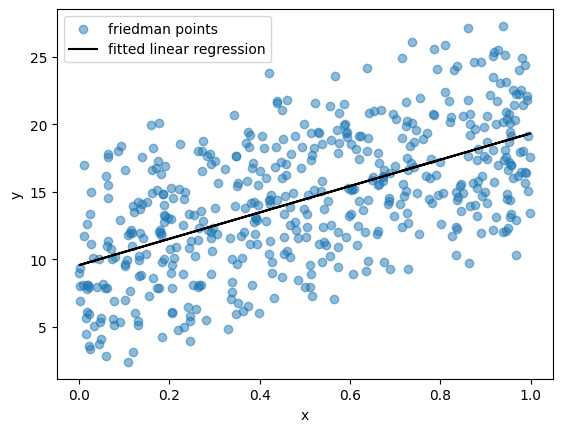

In [8]:
plt.scatter(x, y, alpha=0.5, label="friedman points")
plt.plot(x, y_pred, color='black', label="fitted linear regression")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

The following code will use scikit learn to generate a random binary classification
dataset.  This dataset will have 2 features, and it is a binary task so the label
will consists of two categories, 0 (no), and 1 (yes).

```python
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_classes=2,
                           n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_clusters_per_class=1,
                           class_sep=0.7, random_state=5)
```

Generate the classification data and perform the following tasks on the data.

1. Visualize the classification dataset.  Use the x axis for the feature in column 0 of the X features, and
   the y axis for the feature in column 1.  Plot all of the data on the same figure, but plot the
   no inputs (`y==0`) as blue circles, and the yes labels (`y==1`) as red squares.  Identify your plot
   elements in the figure.
2. Create and fit a default logistic regression on your dataset.
3. Display the intercept and feature coefficients for the fitted model.
4. Determine the accuracy of the fitted model on all of the data.
5. Display the confusion matrix performance of the model on all of the data.

In [9]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_classes=2,
                           n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_clusters_per_class=1,
                           class_sep=0.7, random_state=5)

In [10]:
x_axis = X[:,0].flatten().reshape(-1, 1)
y_axis = X[:,1].flatten().reshape(-1, 1)

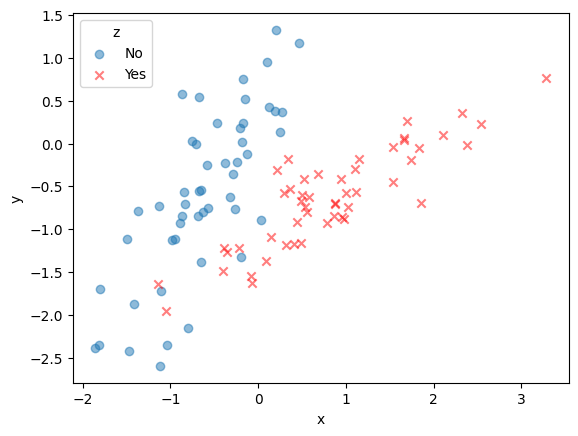

In [11]:
# Answer 3
x_axis_no   = x_axis[y == 0]
y_axis_no   = y_axis[y == 0]
x_axis_yes  = x_axis[y == 1]
y_axis_yes  = y_axis[y == 1]
plt.scatter(x_axis_no, y_axis_no, label="No", marker="o", alpha=0.5)
plt.scatter(x_axis_yes, y_axis_yes, label="Yes", marker="x", alpha=0.5, color="red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(title='z')
plt.show()

In [12]:
# Answer 3
model = LogisticRegression()
model.fit(X, y)
y_pred = model.predict(X)
print("intercept: ", model.intercept_)
print("coef:", model.coef_)
print("accuracy score: ", accuracy_score(y, y_pred))
confusion_matrix(y, y_pred)

intercept:  [-1.0951264]
coef: [[ 3.14862611 -1.69334444]]
accuracy score:  0.93


array([[47,  3],
       [ 4, 46]])